# Handwritten digits recognition

## Imports

In [1]:
import gzip

import keras as kr
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

import numpy as np

import matplotlib
from matplotlib import pyplot as plt

Using TensorFlow backend.
/home/bernard/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bernard/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bernard/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bernard/anaconda3/lib/python3.7/site-packages/t

## Global variables

In [2]:
epochs = 12
num_classes = 10
batch_size = 128

# Input image dimensions
img_rows, img_cols = 28, 28

# Datasets
test_images_file = "../datasets/t10k-images-idx3-ubyte.gz"
test_labels_file = "../datasets/t10k-labels-idx1-ubyte.gz"
train_images_file = "../datasets/train-images-idx3-ubyte.gz"
train_labels_file = "../datasets/train-labels-idx1-ubyte.gz"

## Reading Files

In [3]:
# 10k images
with gzip.open(test_images_file, 'rb') as f:
    test_images = f.read()

# 10k labels
with gzip.open(test_labels_file, 'rb') as f:
    test_labels = f.read()    

# 60k images
with gzip.open(train_images_file, 'rb') as f:
    train_images = f.read()

# 60k labels    
with gzip.open(train_labels_file, 'rb') as f:
    train_labels = f.read()

## Reshape data

In [4]:
# Skip 16 bytes for images file
test_img = ~np.array(list(test_images[16:])).reshape(10000, img_rows, img_cols, 1).astype(np.uint8)
train_img = ~np.array(list(train_images[16:])).reshape(60000, img_rows, img_cols, 1).astype(np.uint8)
input_shape = (img_rows, img_cols, 1)

# Skip 8 bytes for labels file
test_lbl = np.array(list(test_labels[ 8:])).astype(np.uint8)
train_lbl = np.array(list(train_labels[ 8:])).astype(np.uint8)

In [5]:
# Normalize inputs from 0-255 to 0-1
test_img = test_img / 255
train_img = train_img / 255

In [6]:
print(test_img.shape)
print(test_img.shape[0])
print(train_img.shape[0])


(10000, 28, 28, 1)
10000
60000


## Inspect data

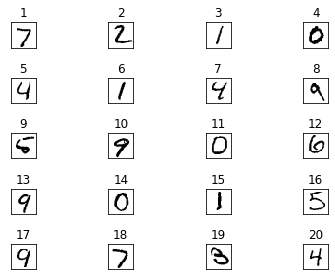

In [7]:
# Image data
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.title(i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.imshow(test_img[i].reshape(28,28), cmap='gray')

In [8]:
# Label data
for i in range(20):
    print(test_lbl[i], end=" ")

7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 

## Convert class vectors to binary class matrices

In [9]:
# one hot encode outputs
test_lbl = np_utils.to_categorical(test_lbl, num_classes)
train_lbl = np_utils.to_categorical(train_lbl, num_classes)

In [10]:
# Inspect matrices
for i in range(10):
    print(test_lbl[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Neural Network

In [11]:
# Start neural network model
model = Sequential()
# Add an input layer with 32 nodes and 784 input dimension
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Add two hidden layers and a pooling layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add a Dropout layer to avoid overfitting
# by randomly dropping components of neural network (outputs) from a layer of neural network
model.add(Dropout(0.5))
# Add output layer
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Fit the model
fit_history = model.fit(train_img, train_lbl, epochs=epochs, batch_size = batch_size, validation_data=(test_img, test_lbl))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 41s 690us/step - loss: 0.3183 - acc: 0.9044 - val_loss: 0.0688 - val_acc: 0.9779
Epoch 2/12
60000/60000 [==============================] - 40s 664us/step - loss: 0.1036 - acc: 0.9694 - val_loss: 0.0425 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 40s 673us/step - loss: 0.0760 - acc: 0.9777 - val_loss: 0.0385 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 40s 662us/step - loss: 0.0624 - acc: 0.9815 - val_loss: 0.0362 - val_acc: 0.9880
Epoch 5/12
60000/60000 [==============================] - 42s 695us/step - loss: 0.0515 - acc: 0.9836 - val_loss: 0.0312 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 40s 660us/step - loss: 0.0444 - acc: 0.9858 - val_loss: 0.0333 - val_acc: 0.9897
Epoch 7/12
60000/60000

In [14]:
# Final evaluation of the model
score = model.evaluate(test_img, test_lbl, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.030174993115015376
Test accuracy: 0.9915


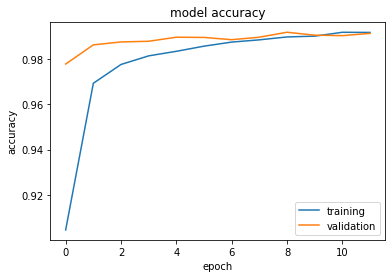

In [16]:
# Plot model accuracy
plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

## Write files for prediction

In [17]:
    model_json = model.to_json()
    
    with open("model.json", "w") as json_file:
      json_file.write(model_json)
    model.save_weights("model.h5")